# Polytest 2
This macro is testing the "compacting" algorithm in TPadPainter.
It reduces the number of polygon's vertices using actual pixel coordinates.


This macro is testing new "compacting" algorithm in TPadPainter
(it reduces the number of polygon's vertices using actual pixel coordinates).
In principle, this test case is what our histograms (fringe cases) are:
"saw-like" polygon (bins == teeth).




**Author:** Timur Pocheptsov  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:43 AM.</small></i>

Includes for aclic.

In [1]:
%%cpp -d
#include <cassert>
#include <vector>

#include "TRandom.h"
#include "TCanvas.h"
#include "Rtypes.h"
#include "TNamed.h"

class PolyTest2 : public TNamed, public TAttLine, public TAttFill {
public:
   PolyTest2();

   void Paint(const Option_t *notUsed);

private:
   enum TestSize {
      kNSawPoints = 10000
   };

   //Part 1.
   std::vector<Double_t> fXs1;
   std::vector<Double_t> fYs1;
   //Part 2.

   std::vector<Double_t> fXs2;
   std::vector<Double_t> fYs2;
};


PolyTest2::PolyTest2()
               : TNamed("polygon_compression_test2", "polygon_compression_test2")
{
   //Polygon 1, n of points is 10003, after 'compression' : 1897
   //Polygon 2, n of points is 10003, after 'compression' : 2093

   //Some canvas must already exist by this point.
   assert(gPad != 0 && "PolyTest2, gPad is null");
   //We need a gRandom to exist.
   assert(gRandom != 0 && "PolyTest2, gRandom is null");

   Double_t xMin = 0., xMax = 0., yMin = 0., yMax = 0.;
   gPad->GetRange(xMin, yMin, xMax, yMax);
   assert(xMax - xMin > 0 && yMax - yMin > 0 && "PolyTest2, invalid canvas' ranges");


   // .(0/the last)--------.(1)
   // |                      /
   // |                      \
   // |                      /
   // .(kNSawPoints + 1)--.(kNSawPoints)

   const unsigned nVertices = 3 + kNSawPoints;

   {
   //Polygon 1, "vertical saw":
   fXs1.resize(nVertices);
   fYs1.resize(nVertices);

   fXs1[0] = 0.;
   fYs1[0] = 0.;

   const Double_t w1 = 0.2 * (xMax - xMin);
   const Double_t saw1ToothSize = 0.1 * w1;
   const Double_t yStep = (yMax - yMin) / (kNSawPoints - 1);

   for (unsigned i = 1; i <= kNSawPoints; ++i) {
      fXs1[i] = w1 + gRandom->Rndm() * saw1ToothSize;
      fYs1[i] = yMin + yStep * (i - 1);
   }

   fXs1[nVertices - 2] = 0.;
   fYs1[nVertices - 2] = yMax;
   //Let's close it.
   fXs1[nVertices - 1] = fXs1[0];
   fYs1[nVertices - 1] = fYs1[0];

   }

   //Polygon 2, "horizontal saw":

   {
   const Double_t x2Min = xMin + 0.25 * (xMax - xMin);
   const Double_t h2 = 0.1 * (yMax - yMin);
   const Double_t saw2ToothSize = 0.1 * h2;
   const Double_t xStep = (xMax - x2Min) / (kNSawPoints - 1);

   fXs2.resize(nVertices);
   fYs2.resize(nVertices);

   fXs2[0] = x2Min;
   fYs2[0] = 0.;

   for (unsigned i = 1; i <= kNSawPoints; ++i) {
      fXs2[i] = x2Min + xStep * i;
      fYs2[i] = h2 + gRandom->Rndm() * saw2ToothSize;
   }

   fXs2[nVertices - 2] = xMax;
   fYs2[nVertices - 2] = 0.;
   fXs2[nVertices - 1] = fXs2[0];
   fYs2[nVertices - 1] = fYs2[0];
   }
}

 _____________________________________________________________
 

In [2]:
%%cpp -d
void PolyTest2::Paint(const Option_t * /*notUsed*/)
{
   assert(gPad != 0 && "Paint, gPad is null");

   SetFillColor(kGreen);
   TAttFill::Modify();
   gPad->PaintFillArea((Int_t)fXs1.size(), &fXs1[0], &fYs1[0]);

   SetLineColor(kBlue);
   TAttLine::Modify();
   gPad->PaintPolyLine((Int_t)fXs1.size(), &fXs1[0], &fYs1[0]);

   SetFillColor(kOrange);
   TAttFill::Modify();
   gPad->PaintFillArea((Int_t)fXs2.size(), &fXs2[0], &fYs2[0]);

   SetLineColor(kMagenta);
   TAttLine::Modify();
   gPad->PaintPolyLine((Int_t)fXs2.size(), &fXs2[0], &fYs2[0]);
}

In [3]:
TCanvas * const cnv = new TCanvas;
cnv->cd();

PolyTest2 * polygon = new PolyTest2;
polygon->Draw();//Attach a polygon to a canvas.

Draw all canvases 

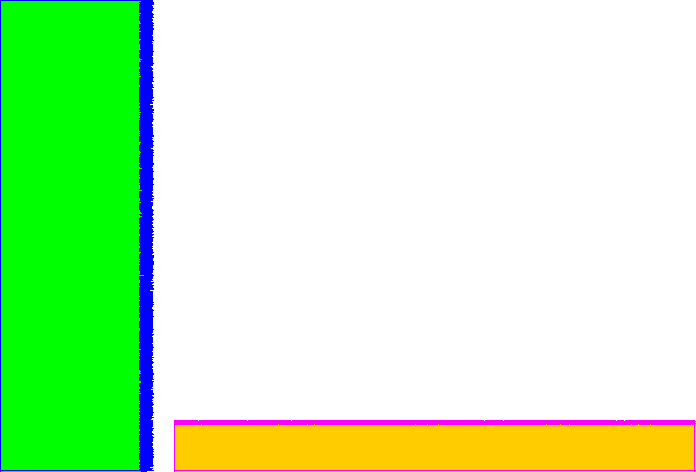

In [4]:
gROOT->GetListOfCanvases()->Draw()